In [1]:
import sys
main_dir = '../'
main_dir2 = '../../OQSPlots'
sys.path.append(main_dir)
sys.path.append(main_dir2)

from functools import lru_cache

from qutip import piqs

import run

import numpy as np
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
import tqdm

import matplotlib.pyplot as plt

import opennu as on
import gammas as ga

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

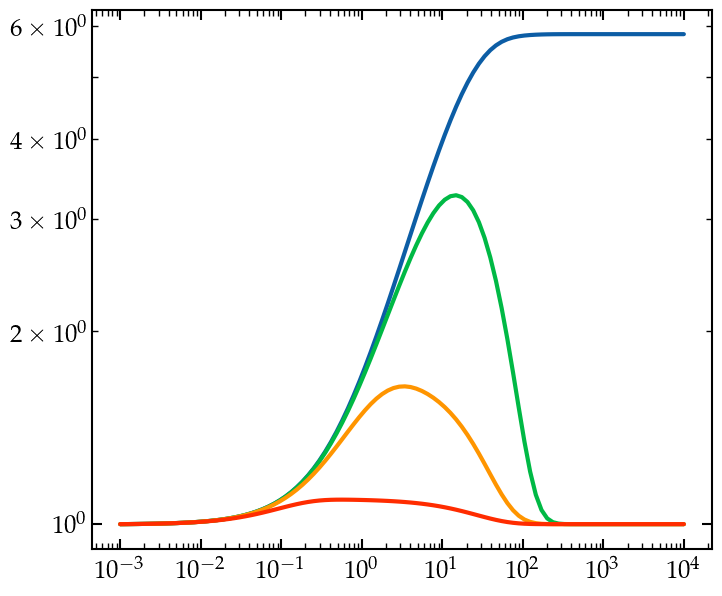

In [7]:
Ncode = 1e2

gpr = 0.997
ti = 1e-3
tf = 1e4
nt = 100

t0, _, _, j0, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=0,    ti=ti, tf=tf, ntimes=nt)
t1, _, _, j1, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=10,   ti=ti, tf=tf, ntimes=nt)
t2, _, _, j2, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=100,  ti=ti, tf=tf, ntimes=nt)
t3, _, _, j3, _ = on.solve2nd(Ncode, gp_ratio=gpr, gd_ratio=1000, ti=ti, tf=tf, ntimes=nt)
plt.loglog(t0, np.sqrt(j0/Ncode*4))
plt.loglog(t1, np.sqrt(j1/Ncode*4))
plt.loglog(t2, np.sqrt(j2/Ncode*4))
plt.loglog(t3, np.sqrt(j3/Ncode*4))

# plt.ylim(0.9,1.1)
plt.show()

In [5]:
onu = '/Users/z5278074/work/OQS/OpenNu/output/N100/'

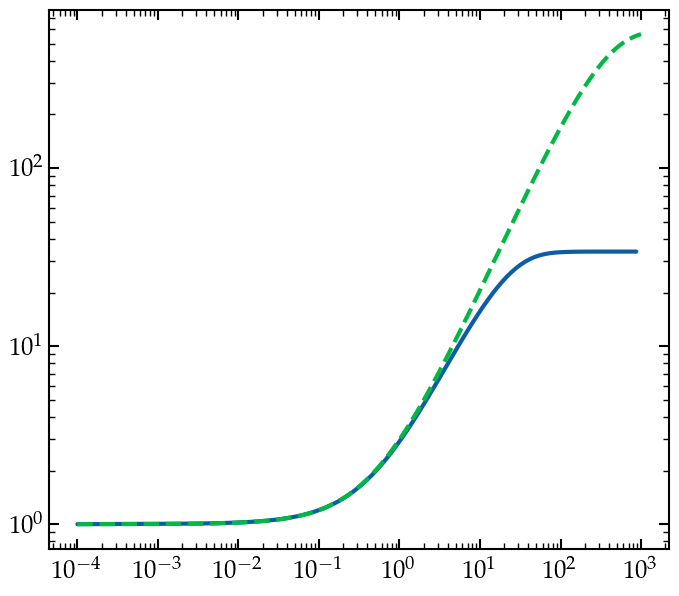

In [17]:
onu_100 = np.loadtxt(onu+'/Ground_Euler_h0.1_g0.997.txt')

Ncode = 10000
t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,tf=1e3)

plt.loglog(onu_100[:,0], onu_100[:,4]/25, label='OpenNu')
plt.loglog(t, j0/Ncode*4, label='Approx', ls='--')
plt.show()

In [11]:
Ncode

10000.0

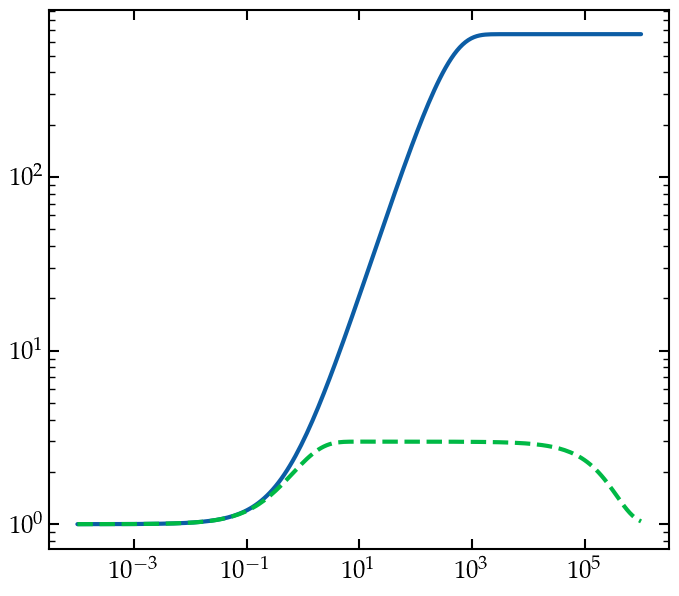

In [27]:
Ncode = 1e6

t0, _, _, j0, _ = on.solve2nd   (Ncode,gp_ratio=0.997,gd_ratio=0,tf=1e6)
t1, _, _, j1, _ = on.solve2nd   (Ncode,gp_ratio=0.997,gd_ratio=Ncode,tf=1e6, )

plt.loglog(t0, j0/Ncode*4)
plt.loglog(t1, j1/Ncode*4, ls='--')
plt.show()

In [ ]:
N = 30
state = piqs.dicke(N,N/2,-N/2)

# Gammas
gE  = 0 # local emission
gD  = 30 # local dephasing
gP  = 0 # local pumping
gCE = 1 # collective emission
gCD = 0 # collective dephasing
gCP = 0.997 # collective pumping

# Time parameters for QuTip
nt = 201
td0 = 1/(N*gCE)
tmax = 100 * td0
tq = np.linspace(0.0001, tmax, nt)

q_jx, q_jz, q_jx2, q_jz2, q_jpm, q_jmp, _ = run.RunQutip(N, tq, state, gE, gD, gP, gCE, gCP, gCD)

Time (in seconds) to generate the Liouvillian: 0.18262887001037598


capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
Traceback (most recent call last):
  File "/Users/z5278074/.venv/base/lib/python3.11/site-packages/qutip/solver/integrator/scipy_integrator.py", line 69, in _mul_np_vec
    out = self.system.matmul_data(t, state)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


In [ ]:
Ncode = 30
t0, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=Ncode,tf=1e3)

In [ ]:
plt.loglog(t0, j0/Ncode*4)
plt.loglog(tq/td0, q_jx2/Ncode*4)
plt.show()

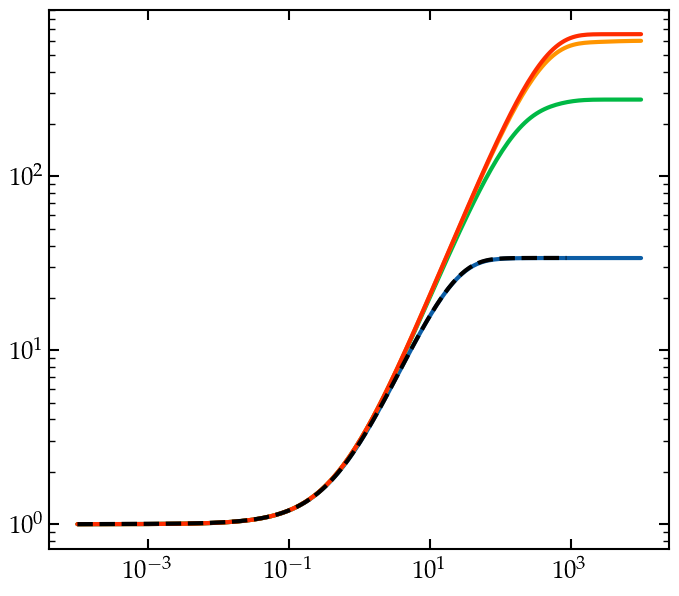

In [28]:
for n in [100,1000,1e4,1e5]:
    t, _, _, j0, _ = on.solve2nd(n,gp_ratio=0.997,gd_ratio=0,tf=1e4)
    plt.loglog(t, j0/n*4)

plt.loglog(onu_100[:,0], onu_100[:,4]/25, label='OpenNu',c='k', ls='--')
plt.show()

In [41]:
1-0.997

0.0030000000000000027

In [ ]:
Ncode = 1e5
# t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,ti=1e-5,tf=1e6)
# t, _, _, j1, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=Ncode,ti=1e-5,tf=1e6)

t, _, _, j0, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0,tf=1e6)
#t, _, _, j1, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=0.1*Ncode,tf=1e6)
t, _, _, j2, _ = on.solve2nd(Ncode,gp_ratio=0.997,gd_ratio=100*Ncode,tf=1e6)
